In [1]:
import glob
import random
from random import randint, choice, shuffle
from PIL import ImageFont

from configs import CFG1, TextBoxCFG, ImageCFG, Point, Margin
from generators import generate_data
from generation_utils import get_tiled_option_cfgs, get_random_color_pair
from utils import split_sentence

# データ読み込み

In [2]:
import pandas as pd

messages = pd.read_csv("texts/message_samples.csv")
names = pd.read_csv("texts/name_samples.csv")
messages.shape, names.shape

((6, 3), (10, 3))

# シンプルな例

和田
レストランを貸切りにして、友達とパーティーをするのが夢なの。早く実現させたいわ。


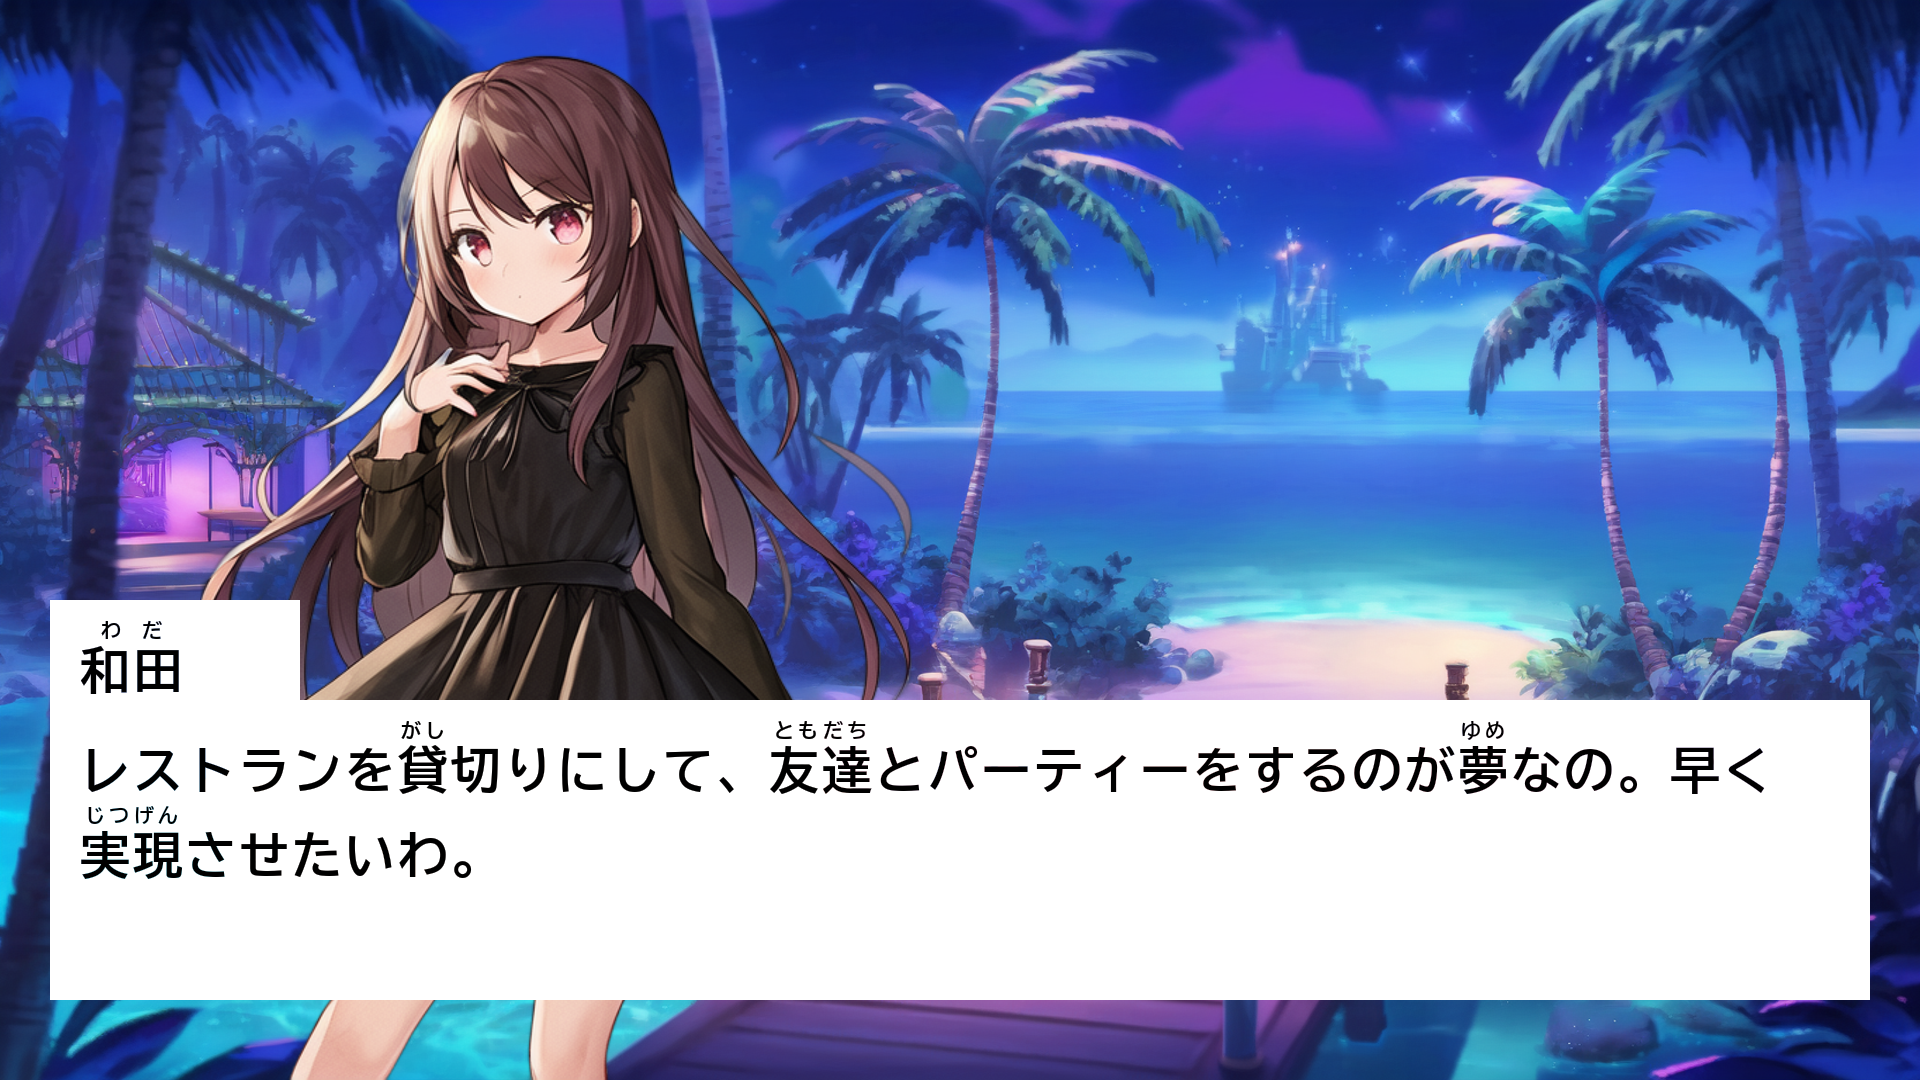

In [3]:
cfg = CFG1()

# 背景画像
cfg.bg_cfg = ImageCFG(path="./sample_images/sample_bg.png")

# キャラクター画像
cfg.character_cfg_list = [
    ImageCFG(path="./sample_images/sample_character.png", tl=Point(200, 0))
    ]

# メッセージ
text = messages.iloc[0]["text_ruby_hiragana"]
cfg.msgbox.text = text
cfg.msgbox.tl = Point(x=50, y=700)  # top leftの座標を指定
cfg.msgbox.br = Point(x=1870, y=1000)  # bottom rightの座標を指定

# 名前
name_text = names.iloc[0]["text_ruby_hiragana"]
cfg.namebox.text = name_text
cfg.namebox.tl = Point(50, 600)
cfg.namebox.br = Point(300, cfg.namebox.tl.y + cfg.namebox.minheight)

output = generate_data(cfg)

print(output.name_text)
print(output.text)
display(output.image)

# 選択肢を表示

ローレ
せん餅って、一口サイズで食べやすくて美味しいわよね。甘さ控えめの黒蜜と一緒にいただくと最高！
['レストランを貸切りにして、友達とパーティーをするのが<ruby>夢<rt>ゆめ<', '甘さ控えめの黒蜜と一緒にいただくと最高！', 'でも、公正な目で見て、素晴らしいプレーには拍手したいと思', '水の音に癒され、最高の一日だった。', '甘さ控えめの黒蜜と一緒にいただくと最高！']


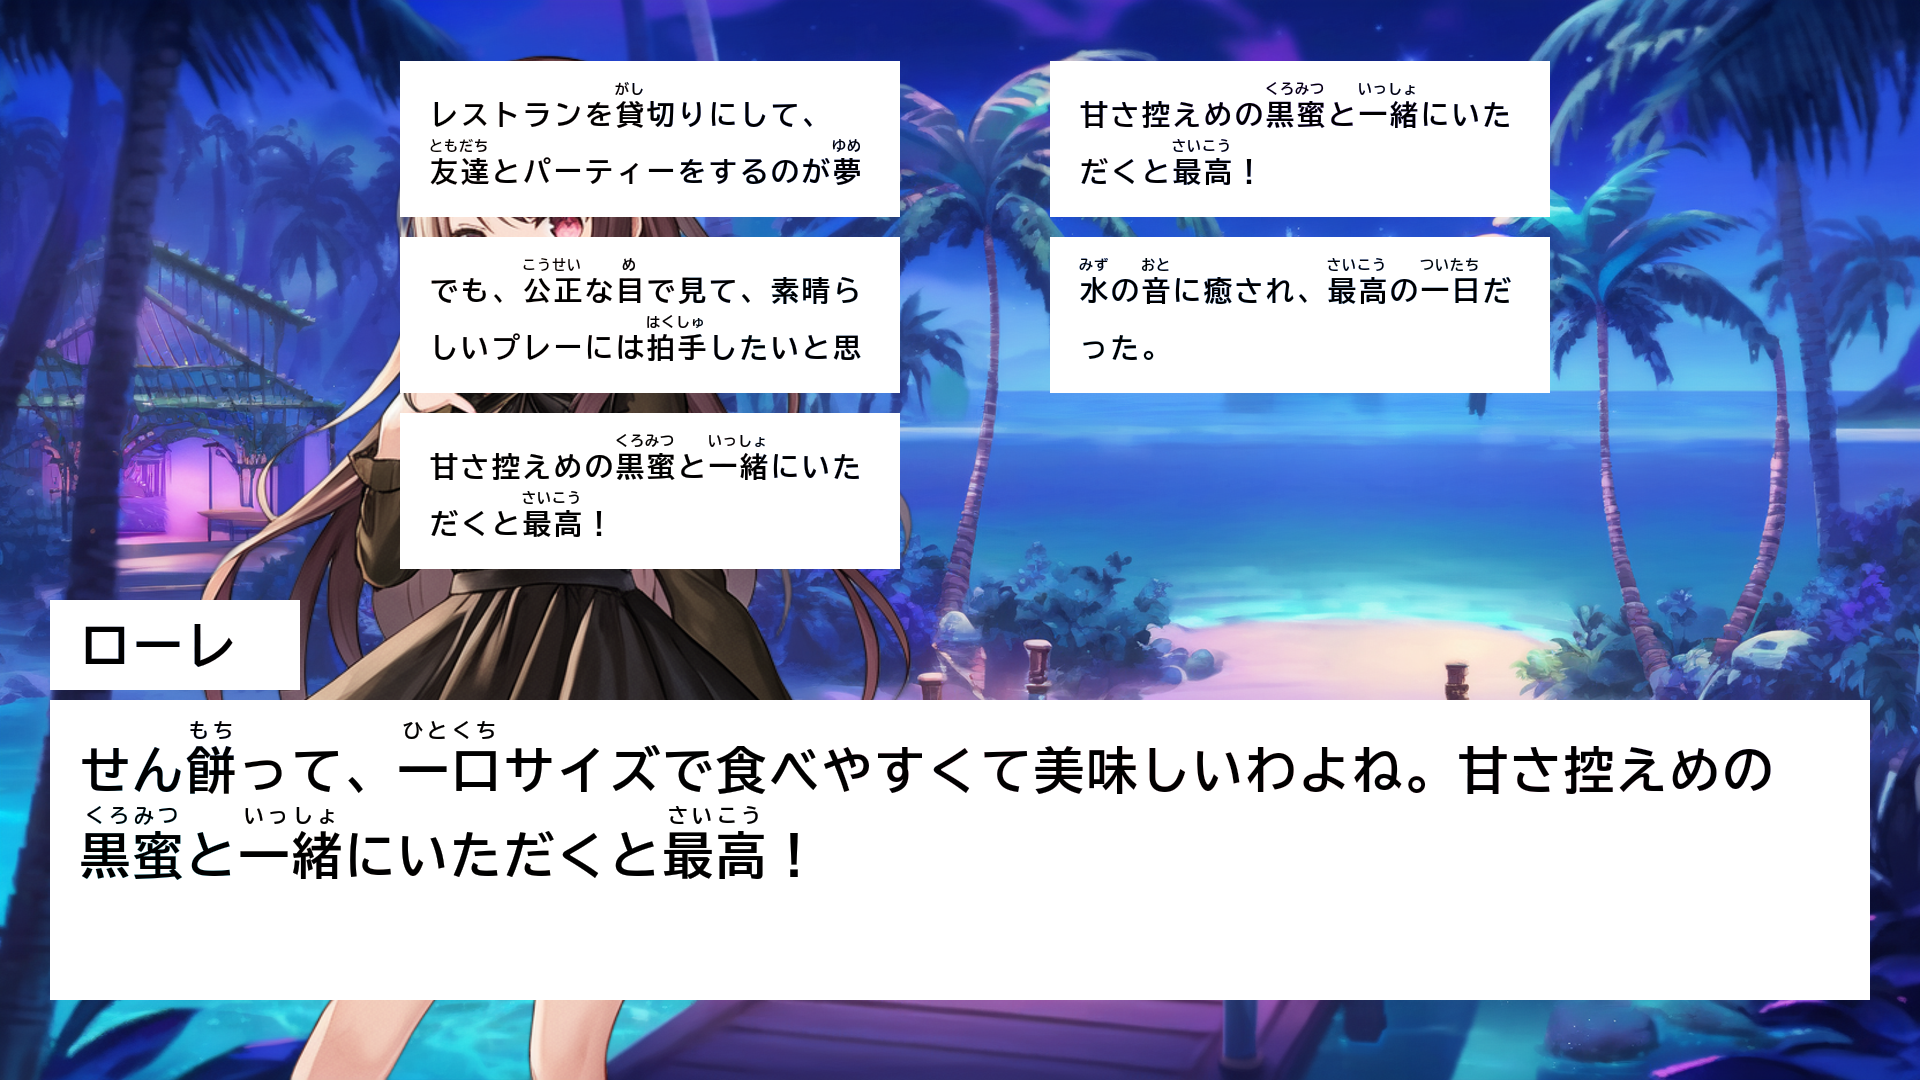

In [4]:
cfg = CFG1()

# 背景画像
cfg.bg_cfg = ImageCFG(path="./sample_images/sample_bg.png")

# キャラクター画像
cfg.character_cfg_list = [
    ImageCFG(path="./sample_images/sample_character.png", tl=Point(200, 0))
    ]

# メッセージ
text = messages.iloc[1]["text_ruby_hiragana"]
cfg.msgbox.text = text
cfg.msgbox.tl = Point(x=50, y=700)  # top leftの座標を指定
cfg.msgbox.br = Point(x=1870, y=1000)  # bottom rightの座標を指定

# 名前
name_text = names.iloc[1]["text_ruby_hiragana"]
cfg.namebox.text = name_text
cfg.namebox.tl = Point(50, 600)
cfg.namebox.br = Point(300, cfg.namebox.tl.y + cfg.namebox.minheight)


# 選択肢
optionbox_list = []
for i in range(5):
    # 選択肢を1つずつ作成
    option_text = random.choice(
        split_sentence(messages.sample(1)["text_ruby_hiragana"].values[0])
        )
    option_cfg = TextBoxCFG()
    option_cfg.text = option_text
    option_cfg.change_font_size(25)
    option_cfg.tl = Point(0, 0)  # 仮の値を入れておく
    option_cfg.br = Point(500, option_cfg.minheight*2)
    optionbox_list.append(option_cfg)

# 選択肢をタイル状に配置
cfg.optionbox_list = get_tiled_option_cfgs(
    nrow=3, ncol=2,
    tl=Point(x=400, y=50), br=Point(x=1870, y=580),
    cfgs=optionbox_list,
    margin_h=20, margin_w=150
    )
output = generate_data(cfg)

print(output.name_text)
print(output.text)
print(output.option_texts)

display(output.image)

# 様々な設定をランダムで作成する

In [5]:
message_fonts = glob.glob("./fonts/*.ttf")
ruby_fonts = glob.glob("./fonts/*.ttf")
bgimage_paths = glob.glob("./sample_images/*bg*.png")
character_image_paths = glob.glob("./sample_images/*character*.png")

def generate_random():
    cfg = CFG1()

    # 名前
    n_names = choice([0, 1])
    if n_names > 0:
        cfg.namebox.text = names.sample(1)[choice(["text", "text_ruby_hiragana", "text_ruby_katakana"])].values[0]
        cfg.namebox.font = ImageFont.truetype(font=choice(message_fonts), size=randint(45, 60))
        font_hex, bg_hex = get_random_color_pair()  # コントラストのある色をランダムに作成する
        cfg.namebox.font_hex = font_hex
        cfg.namebox.bg_hex = bg_hex
        cfg.namebox.centering = choice([True, False])  # 中央寄せ
        cfg.namebox.bg_alpha = randint(180, 220)
        cfg.namebox.tl = Point(choice([randint(50, 200), randint(740, 810)]), randint(500, 700))
        cfg.namebox.br = Point(
            cfg.namebox.tl.x + randint(300, 500),
            cfg.namebox.tl.y + cfg.namebox.minheight + randint(0, 20)
            )
    else:
        cfg.namebox = None

    # メッセージ
    n_messages = choice([0, 1, 1, 1, 1, 1, 1, 1])
    if n_messages > 0:
        cfg.msgbox.text = messages.sample(1)[choice(["text", "text_ruby_hiragana", "text_ruby_katakana"])].values[0]
        cfg.msgbox.font = ImageFont.truetype(font=choice(message_fonts), size=randint(45, choice([60, 60, 60, 80])))
        cfg.msgbox.bg_alpha = randint(180, 220)
        font_hex, bg_hex = get_random_color_pair()
        cfg.msgbox.font_hex = font_hex
        cfg.msgbox.bg_hex = bg_hex
        cfg.msgbox.centering = choice([True, False])
        cfg.msgbox.margin = Margin(top=randint(10, 50), right=randint(20, 100), left=randint(30, 100), bottom=10)
        cfg.msgbox.tl = Point(randint(50, 400), randint(600, 800) if cfg.namebox is None else cfg.namebox.br.y + randint(-20, 50))
        cfg.msgbox.br = Point(randint(1520, 1870), randint(cfg.msgbox.tl.y + cfg.msgbox.minheight, 1060))
    else:
        cfg.msgbox = None

    # 背景画像
    cfg.bg_cfg = ImageCFG(path=choice(bgimage_paths))

    # キャラクター画像
    n_fg_images = choice([0, 1, 2])
    cfg.character_cfg_list = [
        ImageCFG(path=choice(character_image_paths), tl=Point(int((cfg.W // (1+n_fg_images))*(i+0.5)), 0))
        for i in range(n_fg_images)]
    
    # 選択肢
    optionbox_list = []
    nrow = choice([1, 2, 2, 3, 3, 4])
    ncol = choice([0, 1, 1, 1, 2])

    font_hex, bg_hex = get_random_color_pair()
    colorful_option_box = choice([True, False])
    centering_option_box = choice([True, False])
    for _ in range(nrow*ncol):
        option_text = split_sentence(messages.sample(1)[choice(["text", "text_ruby_hiragana", "text_ruby_katakana"])].values[0])[0]
        option_cfg = TextBoxCFG()
        option_cfg.text = option_text
        option_cfg.bg_alpha = randint(180, 220)
        if colorful_option_box:
            font_hex, bg_hex = get_random_color_pair()
        option_cfg.centering = centering_option_box
        option_cfg.font_hex = font_hex
        option_cfg.bg_hex = bg_hex
        option_cfg.tl = Point(randint(50, 300), 0)
        option_cfg.br = Point(randint(1620, 1870), option_cfg.minheight*3)
        option_cfg.font = ImageFont.truetype(font=choice(message_fonts), size=randint(45, 55))
        option_cfg.ruby_font = ImageFont.truetype(font=choice(ruby_fonts), size=randint(12, 18))
        option_cfg.margin = Margin(
            top=randint(10, 20), right=randint(10, 50), left=randint(20, 50), bottom=5)
        optionbox_list.append(option_cfg)
    
    # タイルレイアウト
    if len(optionbox_list) > 0:
        bottomy = cfg.namebox.tl.y if cfg.namebox is not None else cfg.msgbox.tl.y if cfg.msgbox is not None else 1080
        fit_font = choice([True, False, False])
        cfg.optionbox_list = get_tiled_option_cfgs(
            nrow=nrow, ncol=ncol,
            tl = Point(randint(50, 300), randint(10, 20 if nrow > 2 else 200)),
            br = Point(randint(1620, 1870), bottomy - randint(10, 20 if nrow > 2 else 200)),
            cfgs=optionbox_list,
            fit_font=fit_font,
            nowrap=not fit_font
            )

    # OCRしない要素（UI）
    noocrbox_list = []
    noocr_texts = ["SKIP", "LOG", "MENU", "AUTO", "CONFIG", "SAVE"]
    shuffle(noocr_texts)
    font_hex, bg_hex = get_random_color_pair()
    bg_alpha = randint(180, 255)
    font = ImageFont.truetype(font=choice(message_fonts), size=randint(30, 55))
    for i in range(choice([2, 5])):
        noocr_cfg = TextBoxCFG()
        noocr_cfg.centering = True
        noocr_cfg.bg_alpha = bg_alpha
        noocr_cfg.text = noocr_texts[i]
        noocr_cfg.bg_hex = bg_hex
        noocr_cfg.font_hex = font_hex
        noocr_cfg.font = font
        noocr_cfg.margin = Margin(top=0, right=10, left=10, bottom=0)
        noocr_cfg.tl = Point(0, 0)
        noocr_cfg.br = Point(randint(150, 180), noocr_cfg.minheight + randint(0, 10))
        noocrbox_list.append(noocr_cfg)
    
    if len(noocrbox_list) > 0:
        nrow, ncol = len(noocrbox_list), 1
        tl = Point(x=1700, y=randint(700, 800))
        br = Point(x=tl.x+noocr_cfg.size.width, y=tl.y+noocr_cfg.size.height*(nrow+1))
        cfg.noocrbox_list = get_tiled_option_cfgs(nrow=nrow, ncol=ncol, tl=tl, br=br, cfgs=noocrbox_list)

    output = generate_data(cfg)
    gt_obj = {"gt_parse":output.to_gt_parse()}
    return output.image, gt_obj

{'gt_parse': {'options': [['レストランを貸切りにして、友達とパーティーをするのが夢なの。', '宇宙塵って、想像以上に地球に影響を与えるんだって知ってた？', '大自然の中で鰍釣りを楽しんだ。']], 'names': [], 'messages': ['スポーツを観戦する時は、つい贔屓目になってしまうこともある。でも、公正な目で見て、素晴らしいプレーには拍手したいと思うよね。']}}


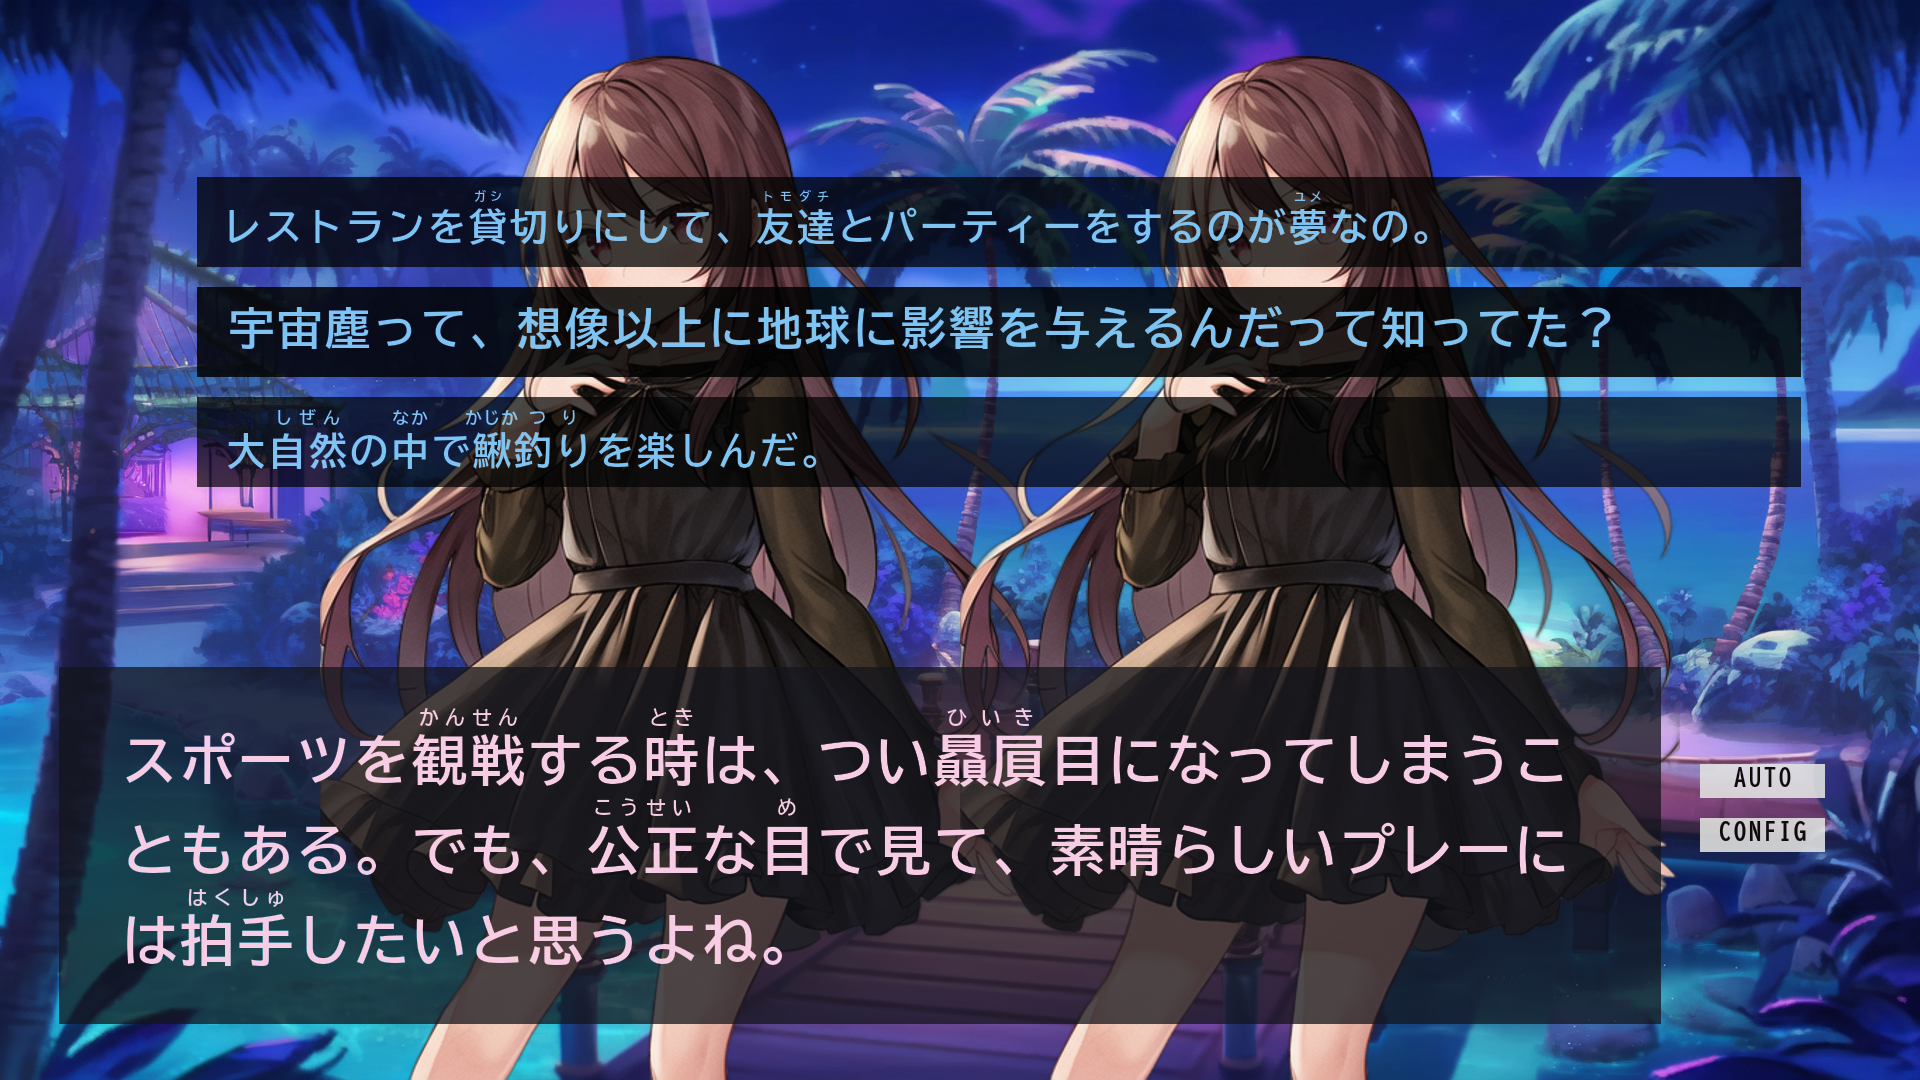

In [6]:
image, ground_truth = generate_random()
print(ground_truth)
display(image)

## 複数生成しDatasetにする

In [7]:
import json
import datasets
from datasets import Dataset

images, gts = [], []
for i in range(10):
    try:
        image, gt = generate_random()
        output_image_path = f"{i:05d}.png"
        image.save(output_image_path)
        images.append(output_image_path)
        gts.append(gt)
    except Exception as e:
        pass

df = pd.DataFrame([
    [img, json.dumps(gt, ensure_ascii=False)] for img, gt in zip(images, gts)
    ], columns=["image", "ground_truth"])
ds = Dataset.from_pandas(df)
ds = ds.cast_column("image", datasets.Image())  # データセットに画像を埋め込む
ds.save_to_disk(f"generated_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/10 [00:00<?, ? examples/s]